# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [1]:
"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""
# Wahrscheinlichkeit = Zahl/Population
# your code here
probability_apple = 60/100
probability_oranges = 40/100


Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is placed in the basket. Therefore, every time we are taking 1 fruit from the same 100 fruits (sample with replacements). 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [7]:
# your code here
# mit zurücklegen > Nenner bleibt gleich, also am Pfad entlang multiplizieren > 1. Pfadregel
# 2. Pfadregel wäre die Wahrscheinlichkeiten verschiedener Szenarien miteinander zu addieren
# https://www.youtube.com/watch?v=gw0AaVLkRE0&ab_channel=MathebyDanielJung

print('The probabilty that all 5 fruits are apple in this case is ' + str((probability_apple**5)))
print('The probabilty that all 5 fruit are apple in this case is ' + str((probability_apple**5)* (probability_oranges**15)))


The probabilty that all 5 fruits are apple in this case is 0.07775999999999998
The probabilty that all 5 fruit are apple in this case is 8.349416423424006e-08


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits, but this time we don't add any more fruits after selecting a fruit (sample without replacements).

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [10]:
# Binominalverteilung und Bernouilli D. Jung
# https://www.youtube.com/watch?v=qRkUCU7oJ34&ab_channel=MathebyDanielJung

# your code here# 
from scipy import stats
from scipy.stats import binom

# Anzahl = 20

n=20

# Wahrscheinlichkeit für Äpfel und Orangen
probability_apple= 60/100
probability_orange = 40/100

p_apple= 60/100
p_orange = 40/100

# Dokumentation binom from scipy
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

print("The probability apples is:", binom.pmf(5, 20, 0.6))
print("The probability oranges is:", binom.pmf(5, 20, 0.4))





The probability apples is: 0.0012944935222876511
The probability oranges is: 0.07464701952887058


In the lesson we also discussed CDF (cumulative distribution function). In Python, this can be calculated with the ```binom()``` function. Read the documentation in order to learn how to use it.


In the context of the above problem, **what is the probability that from the 20 selected fruits, less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [14]:
# your code here
# CDF = kumulative Verteilungsfunktion
# https://www.youtube.com/watch?v=fkLaU1o46W4&ab_channel=MathebyDanielJung
# addiert die Wahrscheinlichkeiten von 1 Apfel, 2 Äpfel... 4 Äpfel zusammen

# documentation CDF
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html
# cdf(k = number success, n = number population, p = probability, loc=0)

print(' The probability in this case is: ' + str(binom.cdf(4, 20, 0.6)))

 The probability in this case is: 0.0003170311211686301


***Optional self learning: We will see matplotlib tomorrow.***

**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

In [ ]:
# your code here




# Please label the axes and give a title to the plot 

## Poisson Distribution

In this challenge you are required to use the Math library in Python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [16]:
# your code here
# 
# mathematische Lösung

import math
math.factorial(n)

def calculate_poisson(k, n):
    return math.exp(-n)*(n**k)/math.factorial(k)

result = calculate_poisson(5, 2.3)

# probability for 5 goals with average goal score 2.3:
result

# Scipy-Lösung
# documentation Poission Scipy
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html



0.0537750255819468

***Optional self learning: We will see matplotlib tomorrow.***


**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

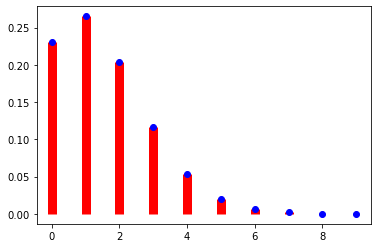

In [31]:
# your code here
%matplotlib inline
from scipy import stats
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt


x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


p1 = calculate_poisson(1, 2.3)
p2 = calculate_poisson(2, 2.3)
p3 = calculate_poisson(3, 2.3)
p4 = calculate_poisson(4, 2.3)
p5 = calculate_poisson(5, 2.3)
p6 = calculate_poisson(6, 2.3)
p7 = calculate_poisson(7, 2.3)
p8 = calculate_poisson(8, 2.3)
p9 = calculate_poisson(9, 2.3)
p10 = calculate_poisson(10, 2.3)

list = [p1, p2, p3, p4, p5, p6, p7, p8, p9, p10]
list

fig, ax = plt.subplots(1, 1)
ax.plot(x, list, 'bo')
ax.vlines(x, 0, list, colors='r',lw=9,  alpha= 1)

# Please label the axes and give a title to the plot 